In [1]:
from BachProp import *
from utils import *

/Users/Flo/Documents/PhD/Code/NIPS18/src/nipsenv/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 28
plt.style.use('ggplot')
plt.rcParams["axes.grid"] = False
c = plt.rcParams['axes.prop_cycle'].by_key()['color']

from IPython import display

In [3]:
model = BachProp('JSB_Chorales')

## Loading

In [4]:
model.loadData()

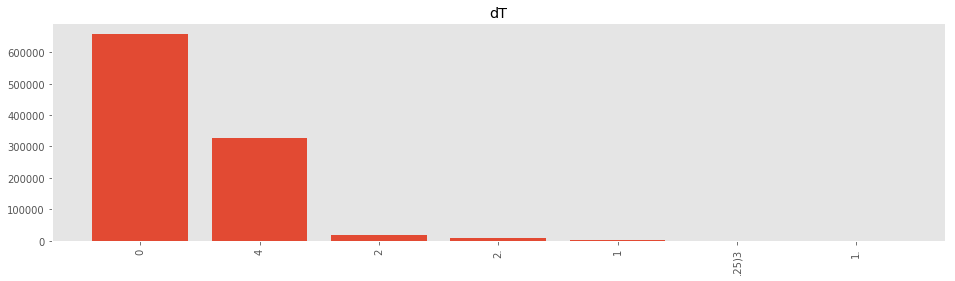

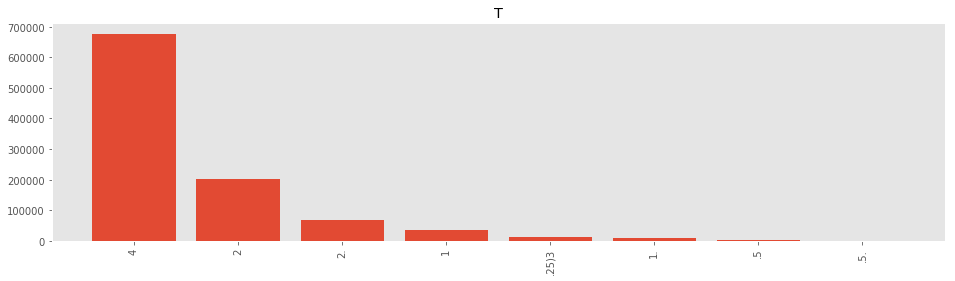

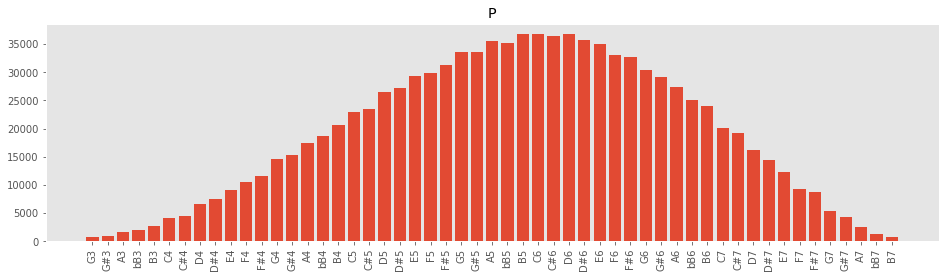

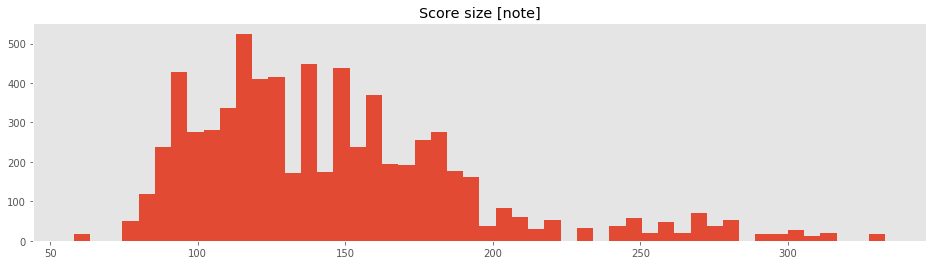

In [5]:
def plotHistograms(dataset, dictionaries):
    
    for key in ['dT', 'T', 'P']:
        flatten = []
        for label, score in dataset.items():
            for x in score[key]:
                flatten.append(x)

        hist = [(entry, flatten.count(entry)) for entry in dictionaries[key]]
        #for h in hist:
        #    print("%i: %i"%(h))
        plt.figure(figsize=(16,4))
        x = range(1,len(hist)+1)
        y = [h[1] for h in hist]
        plt.bar(x, y)
        plt.title(key)
        #locs, labels = plt.xticks()
        plt.xticks(x, dictionaries[key+"_text"], rotation=90)
    
    scorelengths = [len(score['T']) for _, score in dataset.items()]
    plt.figure(figsize=(16,4))
    plt.hist(scorelengths, bins=50)
    plt.title("Score size [note]")
plotHistograms(model.dataset, model.dictionaries)

In [12]:
model.loadModel()
model.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
XdT (InputLayer)                (32, 300, 8)         0                                            
__________________________________________________________________________________________________
XT (InputLayer)                 (32, 300, 9)         0                                            
__________________________________________________________________________________________________
XP (InputLayer)                 (32, 300, 54)        0                                            
__________________________________________________________________________________________________
masking_1 (Masking)             (32, 300, 8)         0           XdT[0][0]                        
__________________________________________________________________________________________________
masking_2 

## Training results

0.6766023


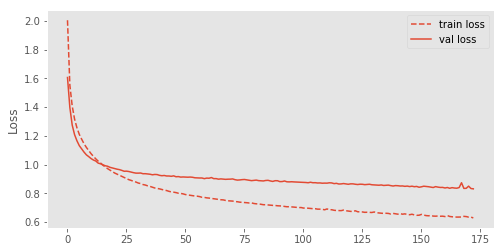

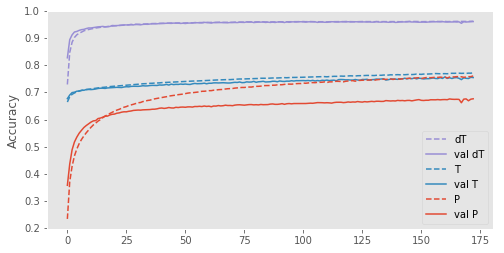

In [13]:
def plotLearningCurves(log):
    
    plt.figure(figsize=(8,4))
    plt.plot(log['loss'], '--', c=c[0], label='train loss')
    plt.plot(log['val_loss'], c=c[0], label='val loss')
    plt.legend(loc='best')
    plt.ylabel('Loss')
    
    plt.figure(figsize=(8,4))
    plt.plot(log['dT_acc'], '--', c=c[2], label='dT')
    plt.plot(log['val_dT_acc'], c=c[2], label='val dT')
    
    plt.plot(log['T_acc'], '--', c=c[1], label='T')
    plt.plot(log['val_T_acc'], c=c[1], label='val T')
    
    plt.plot(log['P_acc'], '--', c=c[0], label='P')
    plt.plot(log['val_P_acc'], c=c[0], label='val P')
    plt.ylabel('Accuracy')
    
    print(max(log['val_P_acc']))
    plt.legend(loc='best')
    
plotLearningCurves(model.log)

## Generate

In [11]:
XdTs_hat, XTs_hat, XPs_hat, XdTs_probs, XTs_probs, XPs_probs = model.generate()
dTs, Ts, Ps = model.ANN2data(XdTs_hat, XTs_hat, XPs_hat)
longMIDI(dTs, Ts, Ps, path=model.genpath, label=str(np.random.randint(100)))

1 dT ended @note #58
29 dT ended @note #90
27 dT ended @note #115
14 dT ended @note #117
21 dT ended @note #166
22 dT ended @note #182
30 dT ended @note #200
8 dT ended @note #218
12 dT ended @note #240
23 T ended @note #263
16 dT ended @note #280
19 dT ended @note #293
7 dT ended @note #295
9 dT ended @note #298
4 dT ended @note #325
10 dT ended @note #335
25 dT ended @note #341
2 dT ended @note #361
28 dT ended @note #365
15 dT ended @note #367
6 dT ended @note #373
17 dT ended @note #379
26 dT ended @note #388
31 dT ended @note #412
5 T ended @note #422
32 dT ended @note #439
11 dT ended @note #441
3 dT ended @note #486
18 dT ended @note #536
24 dT ended @note #562
13 dT ended @note #570
20 dT ended @note #676
End generating: 32/32 song ended
3600.496428571428 3600.4928571428572 1 0
Long enough...YEY


midi.Pattern(format=0, resolution=140, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[60, 90]),
   midi.NoteOnEvent(tick=0, channel=0, data=[63, 90]),
   midi.NoteOnEvent(tick=0, channel=0, data=[67, 90]),
   midi.NoteOnEvent(tick=0, channel=0, data=[72, 90]),
   midi.NoteOffEvent(tick=140, channel=0, data=[63, 90]),
   midi.NoteOffEvent(tick=0, channel=0, data=[67, 90]),
   midi.NoteOnEvent(tick=0, channel=0, data=[53, 90]),
   midi.NoteOnEvent(tick=0, channel=0, data=[68, 90]),
   midi.NoteOffEvent(tick=140, channel=0, data=[60, 90]),
   midi.NoteOffEvent(tick=0, channel=0, data=[72, 90]),
   midi.NoteOffEvent(tick=0, channel=0, data=[53, 90]),
   midi.NoteOffEvent(tick=0, channel=0, data=[68, 90]),
   midi.NoteOnEvent(tick=0, channel=0, data=[55, 90]),
   midi.NoteOnEvent(tick=0, channel=0, data=[63, 90]),
   midi.NoteOnEvent(tick=0, channel=0, data=[70, 90]),
   midi.NoteOnEvent(tick=0, channel=0, data=[75, 90]),
   midi.NoteOffEvent(tick=140, channel=0, data=[

IndexError: list index out of range

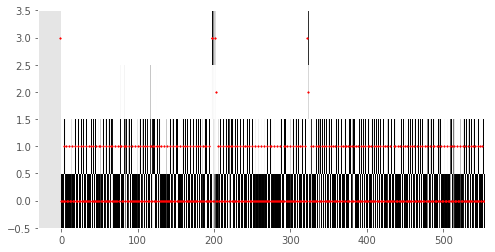

In [13]:
def plotMelody(dT, T, P, dictionaries, PrdT=None, PrP=None, PrT=None, H=None):
    """
    P: The pitch array (integer representation) or matrix (one-hot encoding)
    T: The duration array (integer representation) or matrix (one-hot encoding)
    dictionaries: The dictionaries relating integer to a pitch or duration
    PrP: (Optional) If provided with PrT, plot the transition probabilities
    PrT: (Optional) If provided with PrP, plot the transition probabilities
    H: (Optional) Add a plot with the hidden state dynamic sorted by frequency
    """
    P = np.asarray(P)
    T = np.asarray(T)
    dT = np.asarray(dT)
    if len(P.shape) == 1:#if array
        P = np_utils.to_categorical(P, len(dictionaries['P']))
    if len(T.shape) == 1:#if array
        T = np_utils.to_categorical(T, len(dictionaries['T']))
    if len(dT.shape) == 1:#if array
        dT = np_utils.to_categorical(dT, len(dictionaries['dT']))
    
    xlim = [-1,np.where(P==1)[0][-1]+1]
    
    activeidxes = np.where(np.sum(dT, axis=0)>1.)[0]
    plt.figure(figsize=(8,4))
    if PrdT is not None:
        targets = np.where(dT[:,activeidxes]==1)
        plt.imshow(PrdT[:,activeidxes].T, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
        plt.scatter(targets[0]-1,targets[1], color='red',s=10, marker='.')
    else:
        plt.imshow(dT[:,activeidxes].T, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
    plt.ylim([-0.5,len(activeidxes)-0.5])
    plt.yticks(range(len(activeidxes)),[dictionaries["dT_text"][i] for i in activeidxes])
    plt.tight_layout()
    plt.xlabel("$n$")
    plt.ylabel("$dT[n]$")
    plt.xlim(xlim)
    plt.show()
    
    activeidxes = np.where(np.sum(T, axis=0)>1.)[0]
    plt.figure(figsize=(8,4))
    if PrT is not None:
        targets = np.where(T[:,activeidxes]==1)
        plt.imshow(PrT[:,activeidxes].T, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
        plt.scatter(targets[0]-1,targets[1], color='red',s=10, marker='.')
    else:
        plt.imshow(T[:,activeidxes].T, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
    plt.ylim([-0.5,len(activeidxes)-0.5])
    plt.yticks(range(len(activeidxes)),[dictionaries["T_text"][i] for i in activeidxes])
    plt.tight_layout()
    plt.xlabel("$n$")
    plt.ylabel("$T[n]$")
    plt.xlim(xlim)
    plt.show()
    
    activeidxes = np.where(np.sum(P, axis=0)>1.)[0]
    plt.figure(figsize=(8,4))
    if PrP is not None:
        targets = np.where(P[:,activeidxes]==1)
        plt.imshow(PrP[:,activeidxes].T, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
        plt.scatter(targets[0]-1,targets[1], color='red',s=10, marker='.') 
    else:
        plt.imshow(P[:,activeidxes].T, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
    plt.ylim([-0.5,len(activeidxes)-0.5])
    plt.yticks(range(len(activeidxes)),[dictionaries["P_text"][i] for i in activeidxes])
    plt.tight_layout()
    plt.xlabel("$n$")
    plt.ylabel("$P[n]$")
    plt.xlim(xlim)
    plt.show()
    
    if H is not None:
        diff = np.mean([[abs(j-i) for i,j in zip(H[:xlim[1]-1,k], H[1:xlim[1],k])] for k in range(H.shape[1])], axis=1)
        sortidx = np.argsort(-diff)
        H = H[:,sortidx]
        plt.figure(figsize=(8,4))
        plt.imshow(H.T, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.seismic, vmin=-1, vmax=1)
        plt.xlim([-1,np.where(T==1)[0][-1]+1])
        plt.tight_layout()
        plt.xlabel("$n$")
        plt.ylabel("$H[n]$")
        #plt.title("%.2f"%np.mean(diff))
        plt.show()
        
for s in np.random.choice(model.batch_size, 2):
    plotMelody(XdTs_hat[s], XTs_hat[s], XPs_hat[s], model.dictionaries, PrdT=XdTs_probs[s], PrT=XTs_probs[s], PrP=XPs_probs[s])

In [30]:
def evaluate(X, Y):
    XdT = X['XdT']
    XT = X['XT']
    XP = X['XP']
    YdT = Y['YdT']
    YT = Y['YT']
    YP = Y['YP']
    
    loss, lossdT, lossT, lossP, accdT, accT, accP = model.model.test_on_batch({'XdT': XdT, 'XT': XT, 'XP': XP}, 
                                                                              {'YdT': YdT, 'YT': YT, 'YP': YP})
    print(accdT, accT, accP)
    
    
    PdT, PT, PP = model.model.predict({'XdT': XdT, 'XT': XT, 'XP': XP})
    perfdT = []
    perfT = []
    perfP = []
    for sPdT, sYdT, sPT, sYT, sPP, sYP in zip(PdT, YdT, PT, YT, PP, YP):
        mask = np.where(np.sum(sYdT, axis=1)>0)
        
        acc_dT = np.equal(np.argmax(sPdT[mask], axis=-1),np.argmax(sYdT[mask], axis=-1))
        loss_dT = np.mean(sPdT[mask,np.argmax(sYdT[mask], axis=-1)])
        perfdT.append([np.mean(acc_dT), np.mean(acc_dT[1::3]), np.mean(acc_dT[2::3]), np.mean(acc_dT[0::3])])
        
        acc_T = np.equal(np.argmax(sPT[mask], axis=-1),np.argmax(sYT[mask], axis=-1))
        loss_T = np.mean(sPT[mask,np.argmax(sYT[mask], axis=-1)])
        perfT.append([np.mean(acc_T), np.mean(acc_T[2::3]), np.mean(acc_T[::3]), np.mean(acc_T[1::3])])
        
        acc_P = np.equal(np.argmax(sPP[mask], axis=-1),np.argmax(sYP[mask], axis=-1))
        loss_P = np.mean(sPP[mask,np.argmax(sYP[mask], axis=-1)])
        perfP.append([np.mean(acc_P), np.mean(acc_P[::3]), np.mean(acc_P[1::3]), np.mean(acc_P[2::3])])
    
    
    print(np.mean(perfdT, axis=0), np.mean(perfT, axis=0), np.mean(perfP, axis=0))
    print(np.std(perfdT, axis=0), np.std(perfT, axis=0), np.std(perfP, axis=0))
    
    return np.mean(perfdT, axis=0)[0], np.mean(perfT, axis=0)[0], np.mean(perfP, axis=0)[0]

if model.IO is None:
    model.data2ANN()

validation_split = 0.2
nb_samples = model.IO['XP'].shape[0]
all_idxes = np.asarray(range(nb_samples))
all_batch_idxes = {'train': {}, 'valid': {}}

for step in set(model.TBPTT_steps):
    idxes = all_idxes[np.where(model.TBPTT_steps==step)]
    idxes = list(idxes)
    nb_samples = len(idxes)
    split_idx = int((1 - validation_split) * nb_samples)
    #split_idx -= split_idx % self.batch_size
    all_batch_idxes['train'][str(step)] = idxes[:split_idx]
    all_batch_idxes['train'][str(step)].extend(
                                np.random.choice(idxes[:split_idx], 
                                        model.batch_size - len(all_batch_idxes['train'][str(step)]) % model.batch_size))
    all_batch_idxes['valid'][str(step)] = idxes[split_idx:]
    all_batch_idxes['valid'][str(step)].extend(
                                np.random.choice(idxes[split_idx:], 
                                        model.batch_size - len(all_batch_idxes['valid'][str(step)]) % model.batch_size))

val_epoch_res = []
for step_number in model.TBPTT_steps:
    #Reshape for batches
    np.random.shuffle(all_batch_idxes['valid'][str(step_number)])
    batch_idxes = np.reshape(all_batch_idxes['valid'][str(step_number)], (-1,model.batch_size))
    batch_nbr_per_epoch = len(batch_idxes)
    for batch, idxes in enumerate(batch_idxes):
        model.model.reset_states()
        batch_res = []
        for step in range(step_number):
            res = evaluate({'XdT': model.IO['XdT'][idxes,step*model.TBPTT_size:(step+1)*model.TBPTT_size], 
                                        'XT': model.IO['XT'][idxes,step*model.TBPTT_size:(step+1)*model.TBPTT_size], 
                                        'XP': model.IO['XP'][idxes,step*model.TBPTT_size:(step+1)*model.TBPTT_size]}, 
                                       {'YdT': model.IO['YdT'][idxes,step*model.TBPTT_size:(step+1)*model.TBPTT_size], 
                                       'YT': model.IO['YT'][idxes,step*model.TBPTT_size:(step+1)*model.TBPTT_size], 
                                       'YP': model.IO['YP'][idxes,step*model.TBPTT_size:(step+1)*model.TBPTT_size]})
            val_epoch_res.append(res)
val_epoch_res = np.nanmean(val_epoch_res, axis=0)
val_loss, val_lossdT, val_lossT, val_lossP, val_accdT, val_accT, val_accP = val_epoch_res
print("\t\tloss: %.2f - dT: %.2f - T: %.2f - P: %.2f" %
     (val_loss,val_accdT, val_accT, val_accP))

0.96947914 0.72583336 0.7320833
[0.94894715 0.9449779  0.95029672 0.9515625 ] [0.70964206 0.70618371 0.7109375  0.71180556] [0.69846966 0.67375    0.70802715 0.71364583]
[0.03793742 0.04316455 0.03828244 0.03492039] [0.06984016 0.07215414 0.06760914 0.07553755] [0.07571352 0.07896795 0.07941397 0.07530198]
0.95630664 0.82210803 0.8109246


/Users/Flo/Documents/PhD/Code/NIPS18/src/nipsenv/lib/python3.4/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Flo/Documents/PhD/Code/NIPS18/src/nipsenv/lib/python3.4/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/Users/Flo/Documents/PhD/Code/NIPS18/src/nipsenv/lib/python3.4/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[nan nan nan nan] [nan nan nan nan] [nan nan nan nan]
[nan nan nan nan] [nan nan nan nan] [nan nan nan nan]
0.97333336 0.7402083 0.73322916
[0.94985948 0.94619003 0.95182449 0.9515625 ] [0.71187011 0.71077652 0.71375    0.71108902] [0.69167645 0.681875   0.69423611 0.69892045]
[0.03002829 0.03185737 0.02885938 0.03192857] [0.07994466 0.07709043 0.0836193  0.08367632] [0.06844968 0.07642143 0.07154568 0.06582339]
0.9550063 0.8062432 0.8148258
[nan nan nan nan] [nan nan nan nan] [nan nan nan nan]
[nan nan nan nan] [nan nan nan nan] [nan nan nan nan]
0.97229165 0.744375 0.73614585
[0.95822917 0.95375    0.9584375  0.9625    ] [0.7309375 0.726875  0.7315625 0.734375 ] [0.69708333 0.6790625  0.70625    0.7059375 ]
[0.02420951 0.0257087  0.0281857  0.02222049] [0.05623756 0.06186869 0.05274404 0.05711488] [0.06585838 0.06779378 0.06954091 0.06721511]
0.9457363 0.79293287 0.8111408
[0.81333153        nan        nan 0.81484776] [0.60204125        nan 0.5873579         nan] [0.57608775 0.539356

KeyboardInterrupt: 